In [94]:
import os
import pandas as pd
import numpy as np
%matplotlib inline

In [95]:
#Check if the PUIDATA environmental variable exists
puidata = os.getenv("PUIDATA")
puidata

'/nfshome/ri619/PUIdata'

In [96]:
# Pull data from NYC Open Data using Curl and os. The pulled data is saved into SAT_stats.csv
#  and moved to the relevant folder
!curl https://data.cityofnewyork.us/api/views/f9bf-2cp4/rows.csv?accessType=DOWNLOAD > SAT_stats.csv
!mv SAT_stats.csv $PUIDATA


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 28339    0 28339    0     0   156k      0 --:--:-- --:--:-- --:--:--  157k


In [97]:
!ls $PUIDATA

juris_stats.csv  SAT_stats.csv


In [98]:
#Use pandas to load data into a dataframe
df = pd.read_csv(puidata + "/SAT_stats.csv")

In [99]:
#Using pandas, check the head of the df to see what it looks like. This should print out the top 7 rows. 
df.head(7)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384
5,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHOOL,112,332,557,316
6,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522,574,525


In [100]:
#Check the tail of the dataframe to just check for any discrepancies. 
df.tail(3)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
475,79M645,SCHOOL FOR COOPERATIVE TECHNICAL EDUCATION,s,s,s,s
476,79Q950,GED PLUS s CITYWIDE,8,496,400,426
477,79X490,PHOENIX ACADEMY,9,367,370,360


In [101]:
# Only keeping the columns that I want to use. In this case, we want to keep the Critical Reading scores,
#  the Math scores and the School Name. Again check the head of this new dataframe. 

math_reading_df = df[['SCHOOL NAME','SAT Critical Reading Avg. Score', 'SAT Math Avg. Score']]
math_reading_df.head(7)

,SCHOOL NAME,SAT Critical Reading Avg. Score,SAT Math Avg. Score
0,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,355,404
1,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,383,423
2,EAST SIDE COMMUNITY SCHOOL,377,402
3,FORSYTH SATELLITE ACADEMY,414,401
4,MARTA VALLE HIGH SCHOOL,390,433
5,LOWER EAST SIDE PREPARATORY HIGH SCHOOL,332,557
6,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",522,574


In [102]:
# From looking at the dataframe, there are multiple rows with 's' values rather than a score.
#  The following code removes any rows containing an 's' value rather than a score. 

math_reading_df = math_reading_df[math_reading_df['SAT Math Avg. Score'] != 's']
math_reading_df = math_reading_df[math_reading_df['SAT Critical Reading Avg. Score'] != 's']

# The following two lines of code deal with conflicting types within the dataframe. All the 
#  scores in the dataframe are string types. This code converts them into ints in order to be
#  plotted below. 

math_reading_df['SAT Critical Reading Avg. Score'] = math_reading_df['SAT Critical Reading Avg. Score'].astype(int)
math_reading_df['SAT Math Avg. Score'] = math_reading_df['SAT Math Avg. Score'].astype(int)

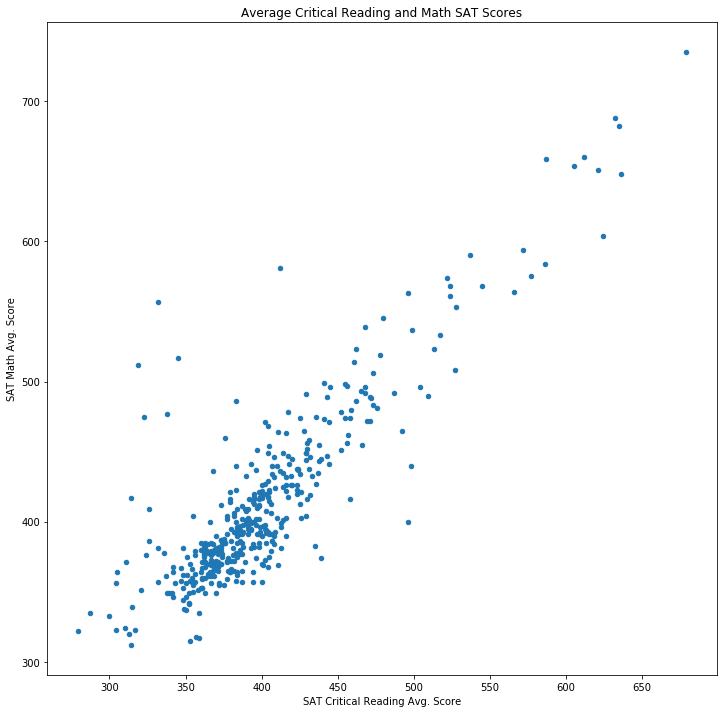

In [103]:
#Plot the code as a scatterplot. 

scatterplot = math_reading_df.plot.scatter(x='SAT Critical Reading Avg. Score', y = 'SAT Math Avg. Score', 
                              title = "Average Critical Reading and Math SAT Scores", figsize = (12,12))




## Figure 1

Figure 1 represents the Average SAT Math and Critical Reading scores for schools across NYC. As we can see, there is a significant positive correlation between an increased Reading score leading to an increased Math score. 

The figure also shows the discrepency between schools within the city. While most schools are averaging around 350-400 in both metrics, there are a significant amount of schools scoring a full 100 points better on average.